## Exercise 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading Dataset
df = pd.read_csv("mtcars.csv")

In [ ]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Q1: 
Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear 
Regression given one predictor attribute and one response attribute. The 
function should return the coefficients of the straight line.

In [ ]:
#linear regression function

def myFnLinReg(X_train,Y_train):
    
    ''' 
    Function for linear regression on 
    1 dependent attribute and 
    1 independent attribute
    '''
        
    coeff = {} # to store coefficients
    costs = [] # will store history of costs
    
    alpha = 0.1 # learning rate
    epochs = 15000 # number of iterations 
    
    M = X_train.shape[0] # number of training examples
    
    w = np.random.randn() # initialising random values for weight 
    
    b = 0 # initialising bias to 0
    
    # iterations
    for epoch in range(epochs):
        
        h = (w * X_train) + b # hypothesis
        
        J = ( 1/(2*M) ) * (((h - Y_train) ** 2).sum()) # cost J of hypothesis
        
        costs.append(J) # appending cost to cost history
        
        dw = ( 1/M ) * (((h - Y_train).dot(X_train)).sum()) # derivative of J w.r.t w
        
        db = ( 1/M ) * ((h - Y_train).sum()) # derivative of J w.r.t b
        
        # updating weight and bias
        w = w - alpha * dw
        b = b - alpha * db
        
    # storing weight and bias   
    coeff["theta"] = w
    coeff["bias"] =  b
    
    return coeff, costs

In [ ]:
# function to predict
def predict(coeff, X_test):
    
    '''
    Calculates prediction and returns
    '''
    
    return coeff["theta"] * X_test + coeff['bias']

## Q2:
Use mtcars data set and consider the attributes mpg and weight. Split data into 
train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to 
build a linear regression model to predict mpg given the weight of the car.

In [ ]:
x = df.wt # assigning independent variable
y = df.mpg # assigning dependent variable

In [ ]:
# splitting the data using train_test_split function from sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# running our function/ training our model

coeff, costs = myFnLinReg(X_train, Y_train)

In [ ]:
# printing final weight and bias

print("weight: {}, bias: {}".format(coeff["theta"], coeff['bias']))

weight: -5.175548697263555, bias: 36.4663981056591


In [ ]:
test_pred = predict(coeff, X_test) # predicting on test data

# printing predicted and actual values test

test_out = {}
test_out["test_pred"] = test_pred
test_out["Y_test"] = Y_test

test_out = pd.DataFrame(test_out)
test_out

,test_pred,Y_test
9,18.662511,19.2
8,20.163420,22.8
2,24.459125,22.8
17,25.080191,32.4
3,19.827009,21.4
26,25.390724,26.0
20,23.708671,21.5


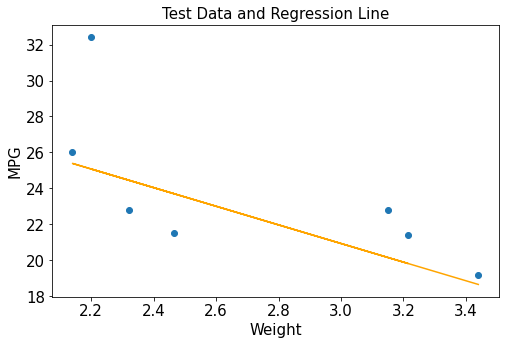

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=15) # controls default text size
plt.rc('axes', titlesize=15) # fontsize of the title

plt.scatter(X_test,Y_test) # scatter plot of test data and expected results

plt.plot(X_test, test_pred, color = 'orange') # lineplot of obtained linear equation

plt.title("Test Data and Regression Line")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

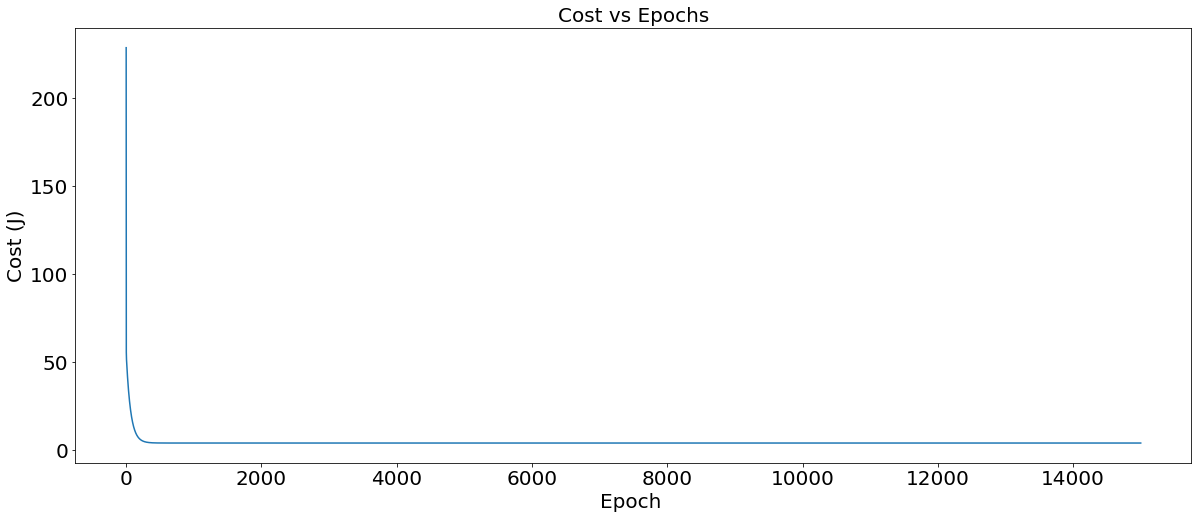

In [ ]:
plt.figure(figsize = (20,8))

plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title

plt.plot(range(1, len(costs)+1), costs) # plotting cost history

plt.title("Cost vs Epochs")
plt.ylabel("Cost (J)")
plt.xlabel("Epoch ")

plt.show()

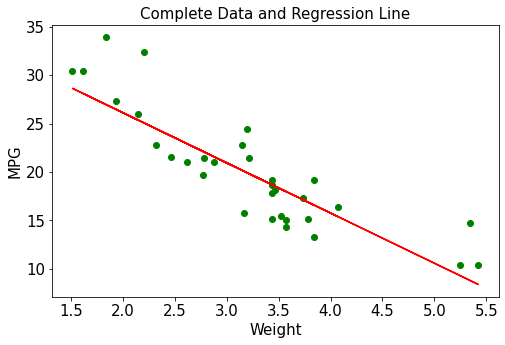

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=15) # controls default text size
plt.rc('axes', titlesize=15) # fontsize of the title

plt.scatter(x,y, color = 'green') # scatter plot of whole data

plt.plot(x, predict(coeff, x), color = 'red') # lineplot of obtained linear equation

plt.title("Complete Data and Regression Line")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

## Q3:
What is the mpg of a car, whose weight is 5.5?

In [ ]:
print("Predicted value for mpg when weight = {} is : {}".format(5.5, predict(coeff, 5.5)))

Predicted value for mpg when weight = 5.5 is : 9.405236584879841


## Q4:
Compute and print accuracy measures such as RMSE and R2 for the test set. 


In [ ]:
def calcrsme(N_test, test_pred, Y_test):
    '''
    Function to calculate Root mean squared error
    '''
    
    return ( (1/N_test) * ( ( (test_pred - Y_test) ** 2) ).sum() )**(0.5) # calculating rsme

In [ ]:
N_test = X_train.shape[0] # number of testing instances

rsme = calcrsme(N_test, test_pred, Y_test) #calculating rsme

print("RSME of test data = {:.6f}".format(rsme))

RSME of test data = 2.148837


In [ ]:
def calcr2score(Y_test, test_pred):
    
    '''
    Function to calculate r2 score
    '''
    
    y_test_mean = Y_test.mean() # mean of test
    sst = ((Y_test - y_test_mean) ** 2).sum() # Sum of Squares Total
    ssr = ((test_pred - y_test_mean) ** 2).sum() # Sum of Square residuals
    
    return 1 - ssr/sst

In [ ]:
r_2 = calcr2score(Y_test, test_pred) # calculating r2 score

print("R-squared score for the test data = {:.6f}\nOR R-squared value is = {:.4f}%".format(r_2, (r_2 * 100) ))

R-squared score for the test data = 0.703310
OR R-squared value is = 70.3310%


## Q5:
Apply the stochastic gradient descent and mini batch gradient descent 
algorithms to enhance the accuracy and visualize the cost function.


<p>
    Since Stochastic Gradient descent is training the model with one training instance at a time and mini batch is for some n instances <= M (number of total training examples).<br><br>
We can think of the three training techniques as implementations of mini-batch gradient descent with the following conditions
<ul type = "*">
    <li>Batch gradient descent has n = M</li>
    <li>Mini batch gradient descent has 1 &lt; n &lt; M</li>
    <li>Stochastic gradient descent has n = 1</li>
</ul>
<b>where n is the batch size</b>
</p>

However here, we will make separate functions for each of the algorithms

### Mini Batch Gradient Descent

In [ ]:
#linear regression function

def MiniBatchLinReg(X_train,Y_train, batch_size):
    
    ''' 
    Function for linear regression on 
    1 dependent attribute and 
    1 independent attribute
    using mini batches for gradient descent
    '''
        
    coeff = {} # to store coefficients
    costs = [] # will store history of costs
    
    alpha = 0.05 # learning rate
    epochs = 1000 # number of iterations 
    
    M = X_train.shape[0] # number of training examples
    
    # initialising random values for weight and 0 for bias
    w = np.random.randn()
    b = 0
    
    n_batches = M/batch_size # number of batches
    
    flag = 0
    
    if n_batches > int(n_batches):
        flag = 1
    
    n_batches = int(n_batches)
    
    # iterations
    for epoch in range(epochs):
        
        J = 0
        
        batch = 0
        
        while batch < n_batches:
            
            X = X_train[batch*batch_size: (batch+1)*batch_size]
            Y = Y_train[batch*batch_size: (batch+1)*batch_size]
            
            h = w*X + b # hypothesis
        
            J = (1/(2*M))*(((h - Y)**2).sum()) # cost J of hypothesis

            dw = (1/M)*(((h - Y).dot(X)).sum()) # derivative of J w.r.t w

            db = (1/M)*((h - Y).sum()) # derivative of J w.r.t b

            # updating weight and bias
            w = w - alpha * dw
            b = b - alpha * db
            
            batch += 1
        
        if flag == 1:
            X = X_train[batch*batch_size:]
            
            h = w*X_train + b # hypothesis
            
            J = (1/(2*M))*(((h - Y_train)**2).sum()) # cost J of hypothesis
            
            dw = (1/M)*(((h - Y_train).dot(X_train)).sum()) # derivative of J w.r.t w
            
            db = (1/M)*((h - Y_train).sum()) # derivative of J w.r.t b
        
        
        costs.append( J ) 

        # updating weight and bias
        w = w - alpha * dw
        b = b - alpha * db
        
    # storing weight and bias   
    coeff["theta"] = w
    coeff["bias"] =  b
    
    return coeff, costs

In [ ]:
# implementing mini batch gradient descent

m_b_size = 5
coeff_m_b , cost_m_b = MiniBatchLinReg(X_train, Y_train, m_b_size)

In [ ]:
# printing final weight and bias

print("weight: {}, bias: {}".format(coeff_m_b["theta"], coeff_m_b['bias']))

weight: -4.337819135645721, bias: 33.941677282569906


In [ ]:
test_pred_m_b = predict(coeff_m_b, X_test) # predicting on test data

# printing predicted and actual values test

test_out_m_b = {}
test_out_m_b["test_pred"] = test_pred_m_b
test_out_m_b["Y_test"] = Y_test

test_out_m_b = pd.DataFrame(test_out_m_b)
test_out_m_b

,test_pred,Y_test
27,27.378557,30.4
3,19.995589,21.4
22,19.041269,15.2
18,26.936099,30.4
23,17.284452,13.3
17,24.398475,32.4
21,18.672554,15.5


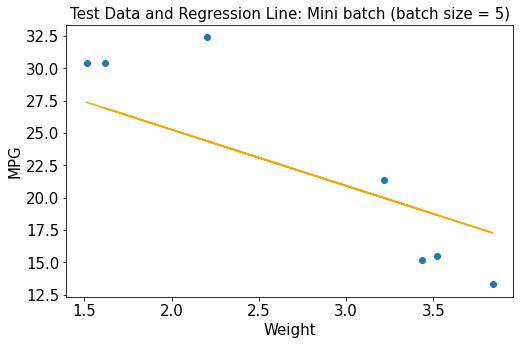

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title

plt.scatter(X_test,Y_test) # scatter plot of test data and expected results

plt.plot(X_test, test_pred_m_b, color = 'orange') # lineplot of obtained linear equation

plt.title("Test Data and Regression Line: Mini batch (batch size = 5)")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

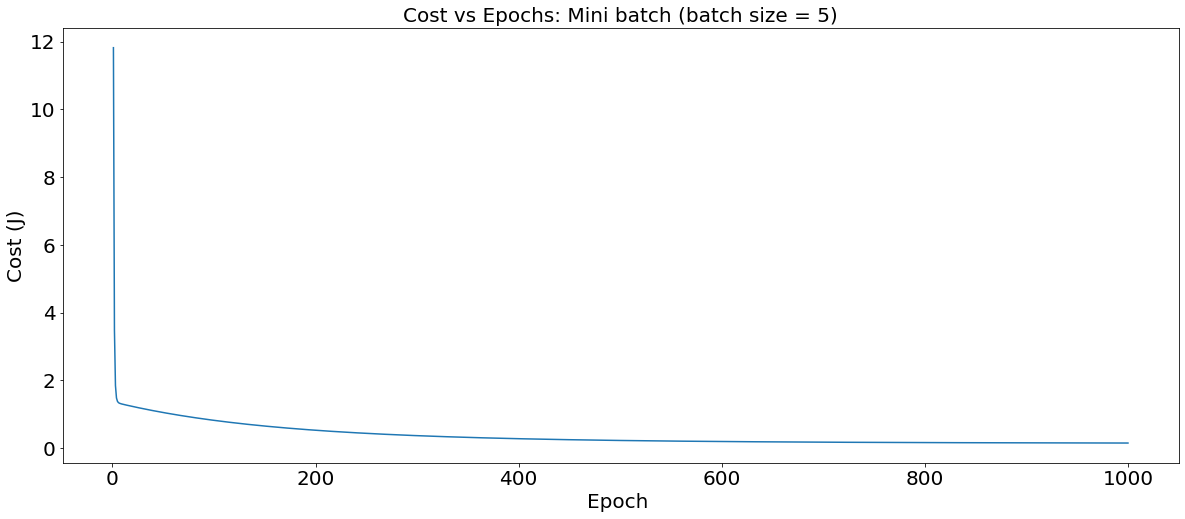

In [ ]:
plt.figure(figsize = (20,8))

plt.rc('font', size=20) # controls default text size
plt.rc('axes', titlesize=20) # fontsize of the title

#plt.figure(figsize = (150,70))

#plt.rc('font', size=90) #controls default text size
#plt.rc('axes', titlesize=90) #fontsize of the title

plt.plot(range(1, len(cost_m_b)+1), cost_m_b) # plotting cost history

plt.title("Cost vs Epochs: Mini batch (batch size = 5)")
plt.ylabel("Cost (J)")
plt.xlabel("Epoch ")

plt.show()

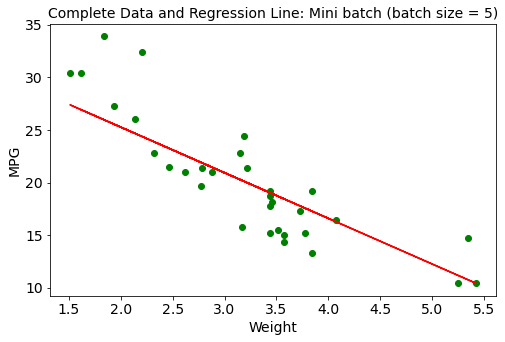

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title

plt.scatter(x,y, color = 'green') # scatter plot of whole data

plt.plot(x, predict(coeff_m_b, x), color = 'red') # lineplot of obtained linear equation

plt.title("Complete Data and Regression Line: Mini batch (batch size = 5)")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

In [ ]:
rsme_m_b = calcrsme(N_test, test_pred_m_b, Y_test) #rsme of minibatch predictions

In [ ]:
print("RSME of test data (mini batch) = {:.6f}".format(rsme_m_b))

RSME of test data (mini batch) = 2.261157


In [ ]:
r2_m_b = calcr2score(Y_test, test_pred_m_b) # calculating r2 score of mini batch gd

print("R-squared score for the test data (mini batch gd) = {:.6f}\nOR R-squared value is = {:.4f}%".format(r2_m_b, (r2_m_b * 100) ))

R-squared score for the test data (mini batch gd) = 0.735795
OR R-squared value is = 73.5795%


### Stochatsic Gradient Descent

In [ ]:
#linear regression function

def StochLinReg(X_train,Y_train):
    
    ''' 
    Function for linear regression on 
    1 dependent attribute and 
    1 independent attribute
    using stochastic gradient descent
    '''
        
    coeff = {} # to store coefficients
    costs = [] # will store history of costs
    
    alpha = 0.05 # learning rate
    epochs = 1000 # number of iterations 
    
    M = X_train.shape[0] # number of training examples
    
    # initialising random values for weight and 0 for bias
    w = np.random.randn()
    b = 0
    
    # iterations
    for epoch in range(epochs):
        
        J = 0
        
        for instance in X_train:
            X = X_train[batch*batch_size: (batch+1)*batch_size]
            Y = Y_train[batch*batch_size: (batch+1)*batch_size]

            h = w*X + b # hypothesis

            J = (1/(2*M))*(((h - Y)**2).sum()) # cost J of hypothesis

            dw = (1/M)*(((h - Y).dot(X)).sum()) # derivative of J w.r.t w

            db = (1/M)*((h - Y).sum()) # derivative of J w.r.t b

            # updating weight and bias
            w = w - alpha * dw
            b = b - alpha * db
            
        costs.append(J)
        
        
    # storing weight and bias   
    coeff["theta"] = w
    coeff["bias"] =  b
    
    return coeff, costs

In [ ]:
# implementing stochastic gradient descent

coeff_s , cost_s = MiniBatchLinReg(X_train, Y_train, 1)

In [ ]:
# printing final weight and bias

print("weight: {}, bias: {}".format(coeff_s["theta"], coeff_s['bias']))

weight: -4.348989339989883, bias: 33.81787085359134


In [ ]:
test_pred_s = predict(coeff_s, X_test) # predicting on test data

# printing predicted and actual values test

test_out_s = {}
test_out_s["test_pred"] = test_pred_s
test_out_s["Y_test"] = Y_test

test_out_s = pd.DataFrame(test_out_s)
test_out_s

,test_pred,Y_test
27,27.237850,30.4
3,19.835870,21.4
22,18.879092,15.2
18,26.794253,30.4
23,17.117752,13.3
17,24.250094,32.4
21,18.509428,15.5


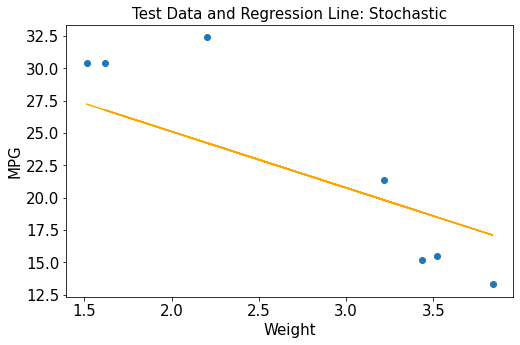

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title

plt.scatter(X_test,Y_test) # scatter plot of test data and expected results

plt.plot(X_test, test_pred_s, color = 'orange') # lineplot of obtained linear equation

plt.title("Test Data and Regression Line: Stochastic")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

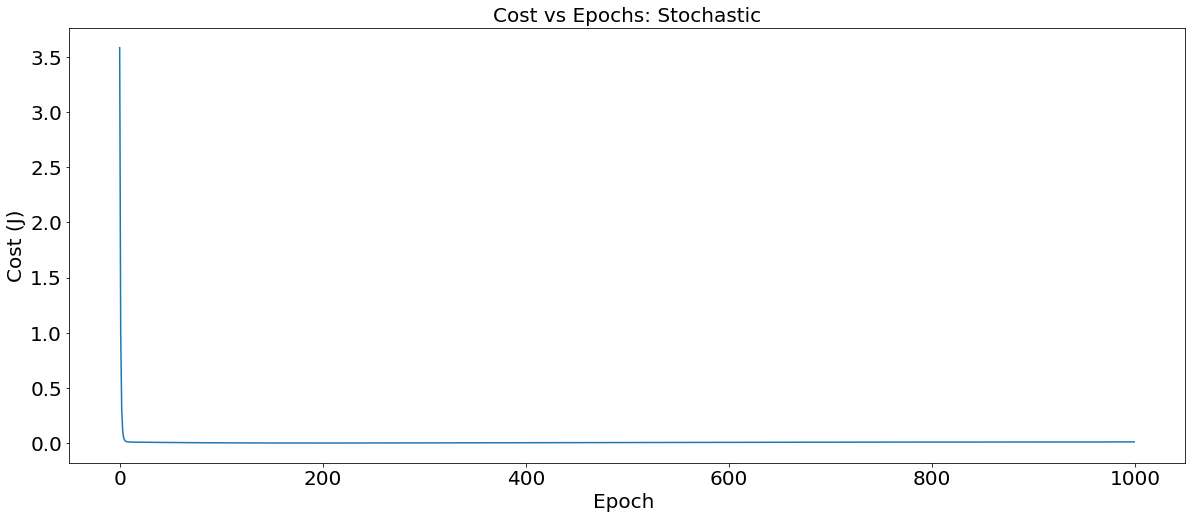

In [ ]:
plt.figure(figsize = (20,8))

plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title

plt.plot(range(len(cost_s)), cost_s) # plotting cost history

plt.title("Cost vs Epochs: Stochastic")
plt.ylabel("Cost (J)")
plt.xlabel("Epoch ")

plt.show()

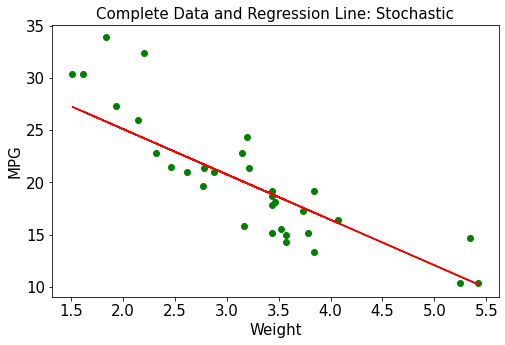

In [ ]:
plt.figure(figsize = (8,5))

plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title

plt.scatter(x,y, color = 'green') # scatter plot of whole data

plt.plot(x, predict(coeff_s, x), color = 'red') # lineplot of obtained linear equation

plt.title("Complete Data and Regression Line: Stochastic")
plt.ylabel("MPG")
plt.xlabel("Weight")

plt.show()

In [ ]:
rsme_s = calcrsme(N_test, test_pred_s, Y_test) 

print("RSME of test data (stochastic gd) = {:.6f}".format(rsme_m_b))

RSME of test data (stochastic gd) = 2.261157


In [ ]:
r2_s = calcr2score(Y_test, test_pred_s) # calculating r2 score of mini batch gd

print("R-squared score for the test data (stochastic) = {:.6f}\nOR R-squared value is = {:.4f}%".format(r2_s, (r2_s * 100) ))

R-squared score for the test data (stochastic) = 0.730384
OR R-squared value is = 73.0384%
